In [71]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_bar, labs, theme, element_text, scale_fill_brewer

In [68]:
# df border crossing 

df_border_crossing = pd.read_csv(f"./dataRaw/{os.listdir('./dataRaw')[0]}")

# Adding year value

df_border_crossing['nr_year'] = df_border_crossing['Date'].map(lambda x: int(x[-4:]))
df_border_crossing['nr_month'] = df_border_crossing['Date'].map(lambda x: x[0:3])



## 📊 **# border crossing**

---

It shows the total number of border crossings in the US by border (MEX, CA)

(*) Data shown in millions




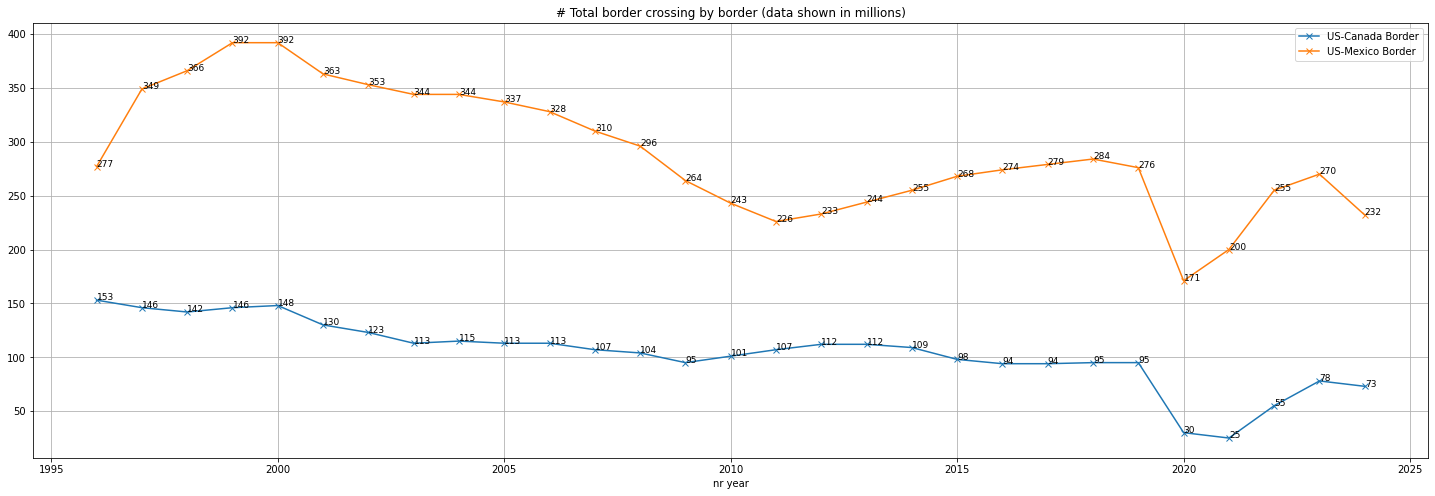

In [57]:
# df tottal border crossing split by border
df_sum = df_border_crossing.groupby(['nr_year', 'Border'])['Value'].sum().unstack().fillna(0)

# Transform values in Millions
for i in df_sum.columns:
    new_row = []
    for y in df_sum[i]:
        new_row.append(int(round(y/1000000,0)))
    
    df_sum[i] = new_row

# Plot
plt.figure(figsize=(25, 8))

# Labels
for border in df_sum.columns:
    plt.plot(df_sum.index, df_sum[border], marker='x', label=border)
    for x, y in zip(df_sum.index, df_sum[border]):
        plt.text(x, y, str(y), fontsize=9)

plt.xlabel('nr year')
plt.title('# Total border crossing by border (data shown in millions)')
plt.legend()
plt.grid(True)
plt.show()


## 📊 **# Crossing by State**

---

It shows the total number of border crossings by state


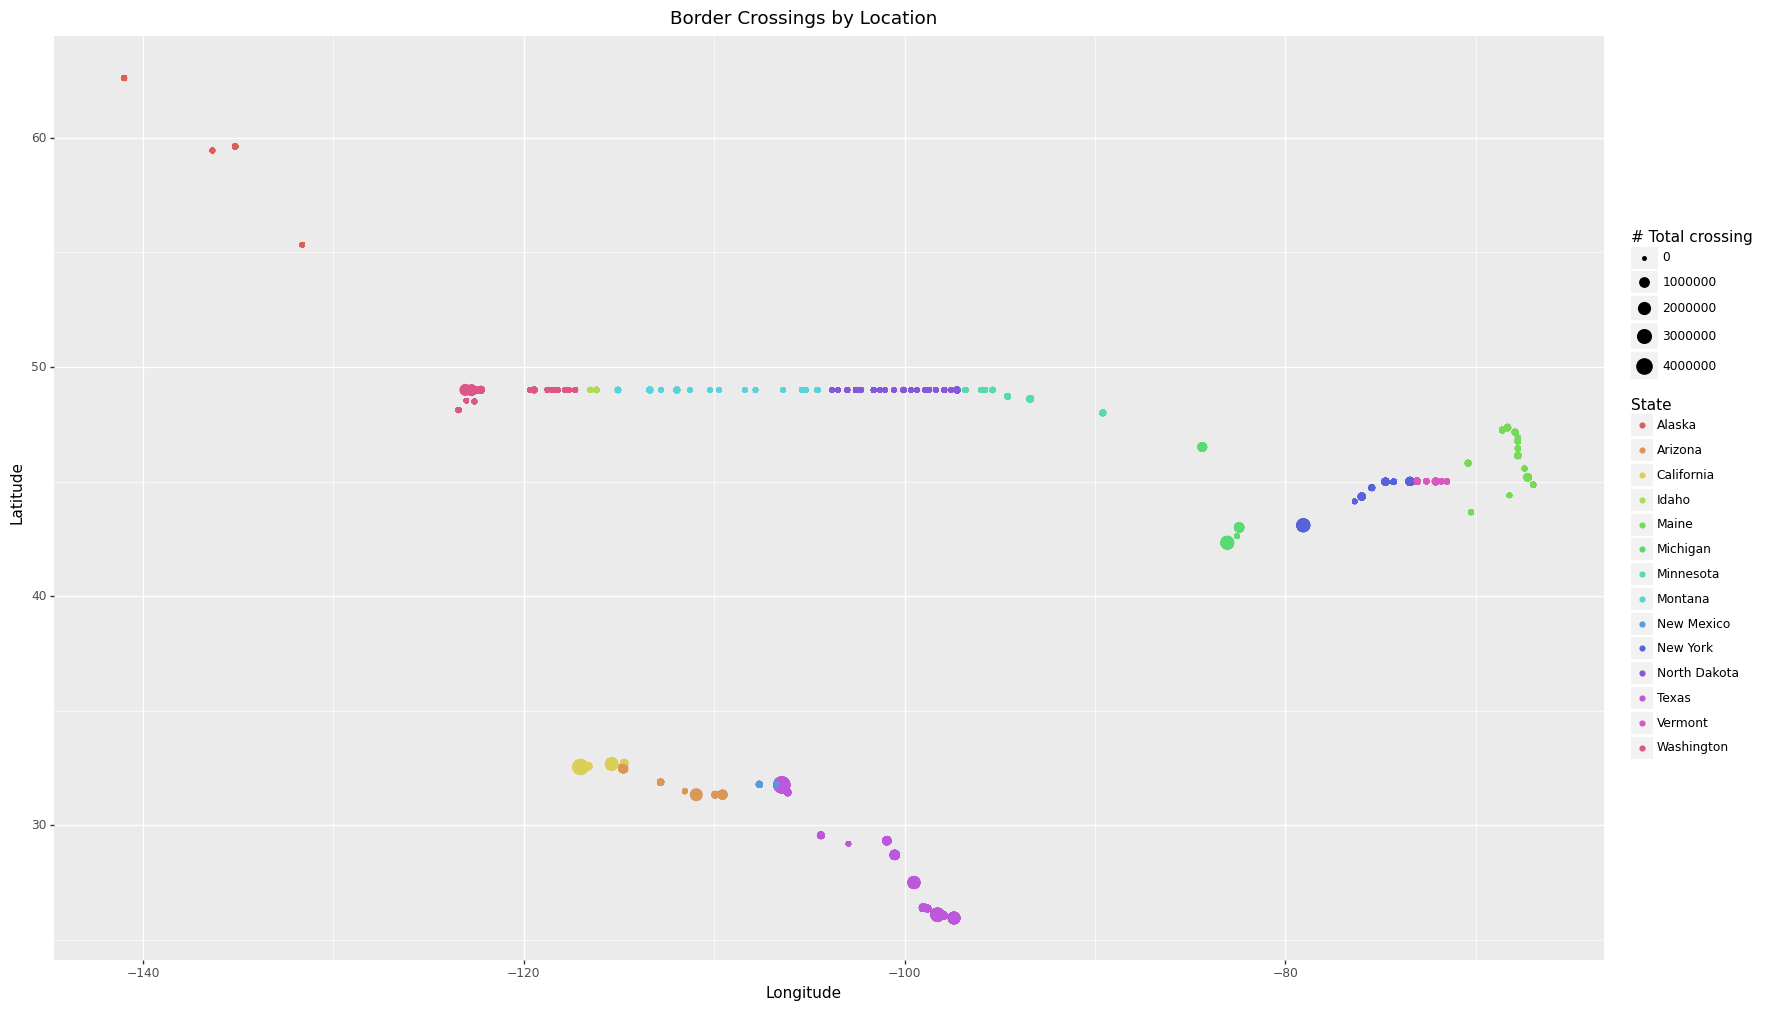

<ggplot: (137289265640)>

In [93]:
import plotnine as p9

# Gráfico de dispersión
(
    ggplot(df_border_crossing)
    + aes(x='Longitude', y='Latitude', size='Value', color='State')
    + p9.geom_point()
    + labs(title="Border Crossings by Location",
           x="Longitude",
           y="Latitude",
           size="# Total crossing",
           color="State")
    + p9.theme(figure_size=(20, 12))
)


In [92]:
df_border_crossing

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point,nr_year,nr_month,geometry
0,Roma,Texas,2310,US-Mexico Border,Dec 2023,Buses,46,26.404,-99.019,POINT (-99.018981 26.403928),2023,Dec,POINT (-99.01900 26.40400)
1,Del Rio,Texas,2302,US-Mexico Border,Dec 2023,Trucks,6552,29.327,-100.928,POINT (-100.927612 29.326784),2023,Dec,POINT (-100.92800 29.32700)
2,Roma,Texas,2310,US-Mexico Border,Nov 2023,Trucks,3753,26.404,-99.019,POINT (-99.018981 26.403928),2023,Nov,POINT (-99.01900 26.40400)
3,Douglas,Arizona,2601,US-Mexico Border,Oct 2023,Buses,13,31.334,-109.560,POINT (-109.560344 31.334043),2023,Oct,POINT (-109.56000 31.33400)
4,Beecher Falls,Vermont,206,US-Canada Border,Aug 2023,Trucks,422,45.013,-71.505,POINT (-71.505309 45.013411),2023,Aug,POINT (-71.50500 45.01300)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396396,Ogdensburg,New York,701,US-Canada Border,Oct 2024,Buses,7,44.733,-75.458,POINT (-75.4577501759 44.7330898624),2024,Oct,POINT (-75.45800 44.73300)
396397,Limestone,Maine,118,US-Canada Border,Oct 2024,Personal Vehicle Passengers,1588,46.925,-67.790,POINT (-67.789597 46.924555),2024,Oct,POINT (-67.79000 46.92500)
396398,Turner,Montana,3306,US-Canada Border,Oct 2024,Truck Containers Empty,34,49.000,-108.388,POINT (-108.387916 48.999527),2024,Oct,POINT (-108.38800 49.00000)
396399,El Paso,Texas,2402,US-Mexico Border,Oct 2024,Rail Containers Loaded,2109,31.764,-106.451,POINT (-106.451188 31.764363),2024,Oct,POINT (-106.45100 31.76400)
